In [1]:
# _______________________________________TASK 1: Data Loading &Exploration ______________________________________

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv('C:/Users/EliteBook 840G2/Documents/GitHub/Loan_applicants_prediction/loan_default.csv')

In [29]:
# _______________________________________TASK 2: Data Preprocessing ______________________________________
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)  
data.duplicated('LoanID').sum()


Missing values in each column:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


0

In [3]:
data.columns
print(data.columns)
print(data.shape)
print(data.head(2))

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')
(255347, 18)
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio   Education  \
0               4         15.23        36      0.44  Bachelor's   
1               1          4.81        60      0.68    Master's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   

  HasCoSigner  Default  
0         Yes     

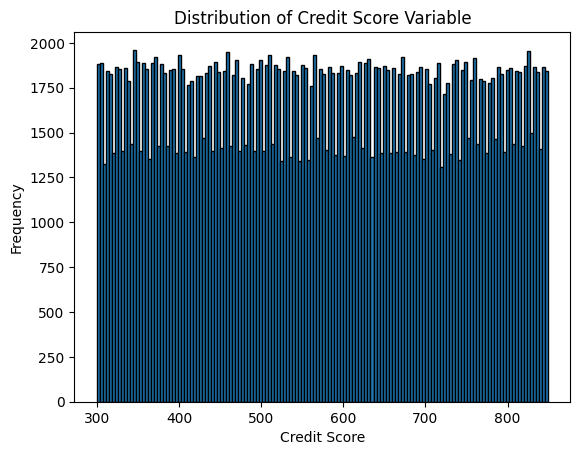

In [18]:

# Visualize the distribution of the target variable 'default"
plt.hist(data['CreditScore'], bins=150, edgecolor='black')
plt.title('Distribution of Credit Score Variable')   
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()  


In [27]:
# lets dive into data training and testing
print(data.columns)
from sklearn.model_selection import train_test_split
import sklearn.linear_model as LR
X_train, X_test, y_train, y_test = train_test_split(data[['Income', 'CreditScore' , 'LoanAmount']], data['Default'], test_size=0.2, random_state=42)
model = LR.LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.91      0.58      0.71     45170
           1       0.15      0.58      0.24      5900

    accuracy                           0.58     51070
   macro avg       0.53      0.58      0.47     51070
weighted avg       0.82      0.58      0.65     51070

[[26117 19053]
 [ 2495  3405]]
